#PROYECTO FINAL MINE-4101: CIENCIA DE DATOS APLICADA - SEGUNDA ENTREGA

Oscar Fernando Bosigas Puerto – 202220008 - o.bosigas

Yeimy Andrea Cano M – 202213304 - y.cano

David Polania Mejia - 202213328 - d.polaniam


In [1]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 315 kB 4.7 MB/s 
     |████████████████████████████████| 102 kB 43.3 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 56.9 MB/s 
     |████████████████████████████████| 690 kB 54.0 MB/s 
     |████████████████████████████████| 4.7 MB 37.3 MB/s 
     |████████████████████████████████| 296 kB 23.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=250b186d17692687ad6ea597e295194c3238408140edbc86333ca4ef55b3e695
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

In [2]:
#Importaciones necesarias

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pandas_profiling import ProfileReport
from datetime import datetime
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# **Entendimiento de los Datos**

Primero se procede a hacer el cargue de los datos que están en el repositorio git del proyecto.

In [3]:
cosechas= pd.read_csv('https://raw.githubusercontent.com/OscarBosigas/Proyecto-Final-Ciencia-de-Datos-Aplicada/main/Evaluaciones_Agropecuarias_Municipales_EVA.csv', sep = ',')

El diccionario de datos provistos es:

| Nombre de la columna | Descripción| 
| --- | --- |
|COD DEPARTAMENTO|	Código del departamento, según lo establecido por el DANE|
|DEPARTAMENTO|	Departamento Colombiano|
|COD MUNICIPIO|	Código del municipio, según lo establecido por el DANE|
|MUNICIPIO|	Municipio Colombiano|
|GRUPO DE CULTIVO|	Categoría del cultivo|
|SUBGRUPO DE CULTIVO|	Tipo de cultivo según categoría|
|CULTIVO|	Nombre del cultivo|
|DESAGRAGACION REGIONAL Y/O SISTEMA PRODUCTIVO|	Nombre genérico del cultivo|
|AÑO|	Año de producción|
|PERIODO|	Periodo médico, siendo A los primeros 6 meses y B los últimos|
|ÁREA SEMBRADA (ha)|	Área sembrada en hectáreas|
|ÁREA COSECHADA (ha)|	Área cosechada en hectáreas|
|PRODUCCIÓN (t)|	Tiempo de producción|
|RENDIMIENTO (t/ha)|	Rendimiento de la cosecha|
|ESTADO FISICO PRODUCCION|	Estado del producto|
|NOMBRE CIENTIFICO|	Nombre científico del cultivo|
|CICLO DE CULTIVO|	Ciclo del cultivo en el país|


Un vista de los primeros registros de los datos:

In [4]:
cosechas.head(10)

CÓD. DEP.        DEPARTAMENTO  CÓD. MUN.   MUNICIPIO GRUPO DE CULTIVO  \
0         15              BOYACA      15114    BUSBANZA       HORTALIZAS   
1         25        CUNDINAMARCA      25754      SOACHA       HORTALIZAS   
2         25        CUNDINAMARCA      25214        COTA       HORTALIZAS   
3         54  NORTE DE SANTANDER      54405  LOS PATIOS       HORTALIZAS   
4         54  NORTE DE SANTANDER      54518    PAMPLONA       HORTALIZAS   
5         68           SANTANDER      68377  LA BELLEZA       HORTALIZAS   
6         25        CUNDINAMARCA      25754      SOACHA       HORTALIZAS   
7         25        CUNDINAMARCA      25214        COTA       HORTALIZAS   
8         54  NORTE DE SANTANDER      54518    PAMPLONA       HORTALIZAS   
9         68           SANTANDER      68377  LA BELLEZA       HORTALIZAS   

  SUBGRUPO DE CULTIVO CULTIVO DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  \
0              ACELGA  ACELGA                                        ACELGA   
1              ACELGA  ACELGA                                        ACELGA   
2              ACELGA  ACELGA                                        ACELGA   
3              ACELGA  ACELGA                                        ACELGA   
4              ACELGA  ACELGA                                        ACELGA   
5              ACELGA  ACELGA                                        ACELGA   
6              ACELGA  ACELGA                                        ACELGA   
7              ACELGA  ACELGA                                        ACELGA   
8              ACELGA  ACELGA                                        ACELGA   
9              ACELGA  ACELGA                                        ACELGA   

    AÑO PERIODO  Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
0  2006   2006B                   2                   1               1   
1  2006   2006B                  82                  80            1440   
2  2006   2006B                   2                   2              26   
3  2006   2006B                   3                   3              48   
4  2006   2006B                   1                   1               5   
5  2006   2006B                   1                   1               6   
6  2007   2007A                  72                  70            1260   
7  2007   2007A                   2                   2              34   
8  2007   2007A                   1                   1               5   
9  2007   2007A                   1                   1               6   

   Rendimiento (t/ha) ESTADO FISICO PRODUCCION NOMBRE CIENTIFICO  \
0                1.00             FRUTO FRESCO     BETA VULGARIS   
1               18.00             FRUTO FRESCO     BETA VULGARIS   
2               17.33             FRUTO FRESCO     BETA VULGARIS   
3               16.00             FRUTO FRESCO     BETA VULGARIS   
4               10.00             FRUTO FRESCO     BETA VULGARIS   
5                6.00             FRUTO FRESCO     BETA VULGARIS   
6               18.00             FRUTO FRESCO     BETA VULGARIS   
7               17.00             FRUTO FRESCO     BETA VULGARIS   
8               10.00             FRUTO FRESCO     BETA VULGARIS   
9                6.00             FRUTO FRESCO     BETA VULGARIS   

  CICLO DE CULTIVO  
0      TRANSITORIO  
1      TRANSITORIO  
2      TRANSITORIO  
3      TRANSITORIO  
4      TRANSITORIO  
5      TRANSITORIO  
6      TRANSITORIO  
7      TRANSITORIO  
8      TRANSITORIO  
9      TRANSITORIO

In [5]:
cosechas.shape

(206068, 17)

Se tiene un set de datos de 206,068 registros con 17 columnas.

Se hace una revisión a las columnas, cantidad de datos y tipo de datos:

In [6]:
cosechas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   CÓD. DEP.                                      206068 non-null  int64  
 1   DEPARTAMENTO                                   206068 non-null  object 
 2   CÓD. MUN.                                      206068 non-null  int64  
 3   MUNICIPIO                                      206067 non-null  object 
 4   GRUPO DE CULTIVO                               206068 non-null  object 
 5   SUBGRUPO DE CULTIVO                            206068 non-null  object 
 6   CULTIVO                                        206068 non-null  object 
 7   DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  206068 non-null  object 
 8   AÑO                                            206068 non-null  int64  
 9   PERIODO                              

De esta revisión se puede observar que hay datos faltantes para algunas columnas:

*   MUNICIPIO (1 dato faltante)
*   Rendimiento (3433 datos faltante)
*   NOMBRE CIENTIFICO (2857 datos faltantes)





In [7]:
cosechas[cosechas['MUNICIPIO'].isnull()]

CÓD. DEP. DEPARTAMENTO  CÓD. MUN. MUNICIPIO       GRUPO DE CULTIVO  \
335         27        CHOCO      27077       NaN  TUBERCULOS Y PLATANOS   

    SUBGRUPO DE CULTIVO  CULTIVO  \
335             MALANGA  MALANGA   

    DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO PERIODO  \
335                                         ACHIN  2015    2015   

     Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
335                 180                 180            2880   

     Rendimiento (t/ha) ESTADO FISICO PRODUCCION    NOMBRE CIENTIFICO  \
335                16.0         TUBERCULO FRESCO  COLOCASIA ESCULENTA   

    CICLO DE CULTIVO  
335            ANUAL

Se hace búsqueda por el código del municipio faltante, para encontrar el nombre del municipo:

In [8]:
cosechas[ cosechas['CÓD. MUN.'] == 27077].iloc[0:3]

CÓD. DEP. DEPARTAMENTO  CÓD. MUN.   MUNICIPIO       GRUPO DE CULTIVO  \
222         27        CHOCO      27077  BAJO BAUDO  TUBERCULOS Y PLATANOS   
242         27        CHOCO      27077  BAJO BAUDO  TUBERCULOS Y PLATANOS   
257         27        CHOCO      27077  BAJO BAUDO  TUBERCULOS Y PLATANOS   

    SUBGRUPO DE CULTIVO  CULTIVO  \
222             MALANGA  MALANGA   
242             MALANGA  MALANGA   
257             MALANGA  MALANGA   

    DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO PERIODO  \
222                                         ACHIN  2007    2007   
242                                         ACHIN  2009    2009   
257                                         ACHIN  2010    2010   

     Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
222                 138                 138            1173   
242                  30                  30             300   
257                  35                  35             350   

     Rendimiento (t/ha) ESTADO FISICO PRODUCCION    NOMBRE CIENTIFICO  \
222                 8.5         TUBERCULO FRESCO  COLOCASIA ESCULENTA   
242                10.0         TUBERCULO FRESCO  COLOCASIA ESCULENTA   
257                10.0         TUBERCULO FRESCO  COLOCASIA ESCULENTA   

    CICLO DE CULTIVO  
222            ANUAL  
242            ANUAL  
257            ANUAL

Ahora se revisan los datos para los que la columna "Rendimiento (t/ha)", tiene valores nulos:

In [9]:
cosechas[cosechas['Rendimiento (t/ha)'].isnull()]

CÓD. DEP.     DEPARTAMENTO  CÓD. MUN.                MUNICIPIO  \
251            27            CHOCO      27250     LITORAL DEL SAN JUAN   
254            27            CHOCO      27150        CARMEN DEL DARIEN   
264            27            CHOCO      27430              MEDIO BAUDO   
265            27            CHOCO      27135  EL CANTON DEL SAN PABLO   
416            76  VALLE DEL CAUCA      76890                   YOTOCO   
...           ...              ...        ...                      ...   
205838         27            CHOCO      27006                   ACANDI   
205862         27            CHOCO      27006                   ACANDI   
205877         76  VALLE DEL CAUCA      76892                    YUMBO   
205898         76  VALLE DEL CAUCA      76892                    YUMBO   
206034         76  VALLE DEL CAUCA      76520                  PALMIRA   

                                        GRUPO DE CULTIVO  \
251                                TUBERCULOS Y PLATANOS   
254                                TUBERCULOS Y PLATANOS   
264                                TUBERCULOS Y PLATANOS   
265                                TUBERCULOS Y PLATANOS   
416     PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES   
...                                                  ...   
205838                                          FRUTALES   
205862                                          FRUTALES   
205877                                          FRUTALES   
205898                                          FRUTALES   
206034                                          FRUTALES   

           SUBGRUPO DE CULTIVO  CULTIVO  \
251                    MALANGA  MALANGA   
254                    MALANGA  MALANGA   
264                    MALANGA  MALANGA   
265                    MALANGA  MALANGA   
416     PLANTAS CONDIMENTARIAS  ACHIOTE   
...                        ...      ...   
205838                  ZAPOTE   ZAPOTE   
205862                  ZAPOTE   ZAPOTE   
205877                  ZAPOTE   ZAPOTE   
205898                  ZAPOTE   ZAPOTE   
206034                  ZAPOTE   ZAPOTE   

       DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO PERIODO  \
251                                            ACHIN  2010    2010   
254                                            ACHIN  2010    2010   
264                                            ACHIN  2010    2010   
265                                            ACHIN  2010    2010   
416                                   ACHIOTE (BIJA)  2009    2009   
...                                              ...   ...     ...   
205838                                        ZAPOTE  2009    2009   
205862                                        ZAPOTE  2010    2010   
205877                                        ZAPOTE  2010    2010   
205898                                        ZAPOTE  2011    2011   
206034                                        ZAPOTE  2017    2017   

        Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
251                    500                   0               0   
254                     70                   0               0   
264                      5                   0               0   
265                      3                   0               0   
416                      1                   0               0   
...                    ...                 ...             ...   
205838                  20                   0               0   
205862                  20                   0               0   
205877                   1                   0               0   
205898                   1                   0               0   
206034                   2                   0               0   

        Rendimiento (t/ha) ESTADO FISICO PRODUCCION    NOMBRE CIENTIFICO  \
251                    NaN         TUBERCULO FRESCO  COLOCASIA ESCULENTA   
254                    NaN         TUBERCULO FRESCO  COLOCASIA ESCULENTA   
264                

Se puede observar en varios registros que la columna 'Rendimiento (t/ha)' cuando tiene valores nulos, las columnas 'Área Cosechada(ha)' y 'Producción (t)' presentan valores en cero. Se aplica filtros para ver si hay valores nulos en 'Rendimiento (t/ha)' pero con valores diferentes a 0 para las columnas 'Área Cosechada(ha)' y 'Producción (t)'. 

In [10]:
cosechas[ (cosechas['Rendimiento (t/ha)'].isnull()) & (cosechas['Área Cosechada(ha)']!=0) ]


Empty DataFrame
Columns: [CÓD. DEP., DEPARTAMENTO, CÓD. MUN., MUNICIPIO, GRUPO DE CULTIVO, SUBGRUPO DE CULTIVO, CULTIVO, DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO, AÑO, PERIODO, Área Sembrada (ha), Área Cosechada(ha), Producción (t), Rendimiento (t/ha), ESTADO FISICO PRODUCCION, NOMBRE CIENTIFICO, CICLO DE CULTIVO]
Index: []

In [11]:
cosechas[ (cosechas['Rendimiento (t/ha)'].isnull()) & (cosechas['Producción (t)']!=0) ]

Empty DataFrame
Columns: [CÓD. DEP., DEPARTAMENTO, CÓD. MUN., MUNICIPIO, GRUPO DE CULTIVO, SUBGRUPO DE CULTIVO, CULTIVO, DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO, AÑO, PERIODO, Área Sembrada (ha), Área Cosechada(ha), Producción (t), Rendimiento (t/ha), ESTADO FISICO PRODUCCION, NOMBRE CIENTIFICO, CICLO DE CULTIVO]
Index: []

Se puede observar que efectivamente para todos los valores de 'Rendimiento (t/ha)' en nulos, los valores de 'Área Cosechada(ha)' y 'Producción (t)' están en 0. 

Dado que Rendimiento es una columna que es resultado de la variable objetivo 'Producción (t), de antemano conocemos que no la vamos a requerir, así como tal no hay imputación para estos valores nulos. Respecto a los valores en 0 para nuestra variable objetivo se revisa la cantidad:

In [12]:
cosechas[cosechas['Producción (t)']==0].count()
cosechas[cosechas['Producción (t)']==0]

CÓD. DEP.     DEPARTAMENTO  CÓD. MUN.     MUNICIPIO GRUPO DE CULTIVO  \
26             19            CAUCA      19110  BUENOS AIRES       HORTALIZAS   
29             25     CUNDINAMARCA      25491       NOCAIMA       HORTALIZAS   
33             19            CAUCA      19110  BUENOS AIRES       HORTALIZAS   
36             25     CUNDINAMARCA      25491       NOCAIMA       HORTALIZAS   
42             25     CUNDINAMARCA      25322        GUASCA       HORTALIZAS   
...           ...              ...        ...           ...              ...   
205862         27            CHOCO      27006        ACANDI         FRUTALES   
205877         76  VALLE DEL CAUCA      76892         YUMBO         FRUTALES   
205898         76  VALLE DEL CAUCA      76892         YUMBO         FRUTALES   
206034         76  VALLE DEL CAUCA      76520       PALMIRA         FRUTALES   
206059          8        ATLANTICO       8549         PIOJO      LEGUMINOSAS   

       SUBGRUPO DE CULTIVO CULTIVO  \
26                  ACELGA  ACELGA   
29                  ACELGA  ACELGA   
33                  ACELGA  ACELGA   
36                  ACELGA  ACELGA   
42                  ACELGA  ACELGA   
...                    ...     ...   
205862              ZAPOTE  ZAPOTE   
205877              ZAPOTE  ZAPOTE   
205898              ZAPOTE  ZAPOTE   
206034              ZAPOTE  ZAPOTE   
206059              FRIJOL  FRIJOL   

       DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO PERIODO  \
26                                            ACELGA  2009   2009A   
29                                            ACELGA  2009   2009A   
33                                            ACELGA  2009   2009B   
36                                            ACELGA  2009   2009B   
42                                            ACELGA  2010   2010A   
...                                              ...   ...     ...   
205862                                        ZAPOTE  2010    2010   
205877                                        ZAPOTE  2010    2010   
205898                                        ZAPOTE  2011    2011   
206034                                        ZAPOTE  2017    2017   
206059                                      ZARAGOZA  2015   2015A   

        Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
26                       1                   1               0   
29                       0                   0               0   
33                       1                   1               0   
36                       0                   0               0   
42                       1                   1               0   
...                    ...                 ...             ...   
205862                  20                   0               0   
205877                   1                   0               0   
205898                   1                   0               0   
206034                   2                   0               0   
206059                   3                   1               0   

        Rendimiento (t/ha) ESTADO FISICO PRODUCCION   NOMBRE CIENTIFICO  \
26                    0.50             FRUTO FRESCO       BETA VULGARIS   
29                    0.32             FRUTO FRESCO       BETA VULGARIS   
33                    0.50             FRUTO FRESCO       BETA VULGARIS   
36                    0.32             FRUTO FRESCO       BETA VULGARIS   
42                    0.25             FRUTO FRESCO       BETA VULGARIS   
...                    ...                      ...                 ...   
205862                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
205877                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
205898                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
206034                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
206059                0.30               GRANO SECO  PHASEOLUS VULGARIS   

       CICLO DE CULTIVO  
26          TRANSITORIO  
29 

Del conjunto de datos con producción 0 se encontraron valores de área sembrada también en 0:

In [13]:
cosechas[ (cosechas['Área Sembrada (ha)'] == 0) & (cosechas['Producción (t)']==0) ]

CÓD. DEP.              DEPARTAMENTO  CÓD. MUN.           MUNICIPIO  \
29             25              CUNDINAMARCA      25491             NOCAIMA   
36             25              CUNDINAMARCA      25491             NOCAIMA   
47             15                    BOYACA      15491               NOBSA   
61             15                    BOYACA      15500              OICATA   
4636           88  SAN ANDRES Y PROVIDENCIA      88001          SAN ANDRES   
...           ...                       ...        ...                 ...   
193618          5                 ANTIOQUIA       5686  SANTA ROSA DE OSOS   
193981         97                    VAUPES      97666             TARAIRA   
204275         68                 SANTANDER      68132          CALIFORNIA   
204342         68                 SANTANDER      68132          CALIFORNIA   
204407         68                 SANTANDER      68132          CALIFORNIA   

       GRUPO DE CULTIVO SUBGRUPO DE CULTIVO    CULTIVO  \
29           HORTALIZAS              ACELGA     ACELGA   
36           HORTALIZAS              ACELGA     ACELGA   
47           HORTALIZAS              ACELGA     ACELGA   
61           HORTALIZAS              ACELGA     ACELGA   
4636           FRUTALES            AGUACATE   AGUACATE   
...                 ...                 ...        ...   
193618         FRUTALES   FRUTALES EXOTICOS     UCHUVA   
193981         FRUTALES   FRUTALES EXOTICOS      UMARI   
204275       HORTALIZAS           ZANAHORIA  ZANAHORIA   
204342       HORTALIZAS           ZANAHORIA  ZANAHORIA   
204407       HORTALIZAS           ZANAHORIA  ZANAHORIA   

       DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO PERIODO  \
29                                            ACELGA  2009   2009A   
36                                            ACELGA  2009   2009B   
47                                            ACELGA  2010   2010B   
61                                            ACELGA  2011   2011B   
4636                                        AGUACATE  2017    2017   
...                                              ...   ...     ...   
193618                                        UCHUVA  2016    2016   
193981                                         UMARI  2017    2017   
204275                                     ZANAHORIA  2007   2007B   
204342                                     ZANAHORIA  2008   2008A   
204407                                     ZANAHORIA  2008   2008B   

        Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
29                       0                   0               0   
36                       0                   0               0   
47                       0                   0               0   
61                       0                   0               0   
4636                     0                   0               0   
...                    ...                 ...             ...   
193618                   0                   0               0   
193981                   0                   0               0   
204275                   0                   0               0   
204342                   0                   0               0   
204407                   0                   0               0   

        Rendimiento (t/ha) ESTADO FISICO PRODUCCION        NOMBRE CIENTIFICO  \
29                    0.32             FRUTO FRESCO            BETA VULGARIS   
36                    0.32             FRUTO FRESCO            BETA VULGARIS   
47                    0.28             FRUTO FRESCO            BETA VULGARIS   
61                    0.28             FRUTO FRESCO            BETA VULGARIS   
4636                  9.75             FRUTO FRESCO   PERSEA AMERICANA MILL.   
...                    ...                      ...                      ...   
193618                4.00             FRUTO FRESCO       PHYSALIS PERUVIANA   
193981                6.00             FRUTO FRESCO  PORAQUEIBA SERICEA TUL.   
204275              

In [14]:
cosechas[ (cosechas['Área Sembrada (ha)'] != 0) & (cosechas['Producción (t)']==0) ]

CÓD. DEP.     DEPARTAMENTO  CÓD. MUN.     MUNICIPIO GRUPO DE CULTIVO  \
26             19            CAUCA      19110  BUENOS AIRES       HORTALIZAS   
33             19            CAUCA      19110  BUENOS AIRES       HORTALIZAS   
42             25     CUNDINAMARCA      25322        GUASCA       HORTALIZAS   
50             25     CUNDINAMARCA      25322        GUASCA       HORTALIZAS   
83             19            CAUCA      19364       JAMBALO       HORTALIZAS   
...           ...              ...        ...           ...              ...   
205862         27            CHOCO      27006        ACANDI         FRUTALES   
205877         76  VALLE DEL CAUCA      76892         YUMBO         FRUTALES   
205898         76  VALLE DEL CAUCA      76892         YUMBO         FRUTALES   
206034         76  VALLE DEL CAUCA      76520       PALMIRA         FRUTALES   
206059          8        ATLANTICO       8549         PIOJO      LEGUMINOSAS   

       SUBGRUPO DE CULTIVO CULTIVO  \
26                  ACELGA  ACELGA   
33                  ACELGA  ACELGA   
42                  ACELGA  ACELGA   
50                  ACELGA  ACELGA   
83                  ACELGA  ACELGA   
...                    ...     ...   
205862              ZAPOTE  ZAPOTE   
205877              ZAPOTE  ZAPOTE   
205898              ZAPOTE  ZAPOTE   
206034              ZAPOTE  ZAPOTE   
206059              FRIJOL  FRIJOL   

       DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO   AÑO PERIODO  \
26                                            ACELGA  2009   2009A   
33                                            ACELGA  2009   2009B   
42                                            ACELGA  2010   2010A   
50                                            ACELGA  2010   2010B   
83                                            ACELGA  2013   2013A   
...                                              ...   ...     ...   
205862                                        ZAPOTE  2010    2010   
205877                                        ZAPOTE  2010    2010   
205898                                        ZAPOTE  2011    2011   
206034                                        ZAPOTE  2017    2017   
206059                                      ZARAGOZA  2015   2015A   

        Área Sembrada (ha)  Área Cosechada(ha)  Producción (t)  \
26                       1                   1               0   
33                       1                   1               0   
42                       1                   1               0   
50                       1                   1               0   
83                       1                   1               0   
...                    ...                 ...             ...   
205862                  20                   0               0   
205877                   1                   0               0   
205898                   1                   0               0   
206034                   2                   0               0   
206059                   3                   1               0   

        Rendimiento (t/ha) ESTADO FISICO PRODUCCION   NOMBRE CIENTIFICO  \
26                    0.50             FRUTO FRESCO       BETA VULGARIS   
33                    0.50             FRUTO FRESCO       BETA VULGARIS   
42                    0.25             FRUTO FRESCO       BETA VULGARIS   
50                    0.25             FRUTO FRESCO       BETA VULGARIS   
83                    0.50             FRUTO FRESCO       BETA VULGARIS   
...                    ...                      ...                 ...   
205862                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
205877                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
205898                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
206034                 NaN             FRUTO FRESCO     POUTERIA SAPOTA   
206059                0.30               GRANO SECO  PHASEOLUS VULGARIS   

       CICLO DE CULTIVO  
26          TRANSITORIO  
33 

Los valores en 0 para la varaible objetivo "Producción (t)" es de 3807 que corresponden al 1.85% de los datos. De los cuales 164 registros (0.08%) son datos en los que la columna cosecha también está en 0. 

Dado que es la varaible objetivo, se prefiere borrar en vez de imputar por algun valor que realmente pueda no reflejar la realidad de dichos cultivos.

Respecto a 'NOMBRE CIENTIFICO', es otra forma de llamar al cultivo, que realmente no aporta nueva información al modelo (además de tener alta cardinalidad como se expone en el pandas-profiling) luego al ser una columna que no se será utilizada, nos e aplcia ninguna tecnica de imputación de datos.

In [15]:
cosechas.describe()

CÓD. DEP.      CÓD. MUN.            AÑO  Área Sembrada (ha)  \
count  206068.000000  206068.000000  206068.000000       206068.000000   
mean       40.322563   40747.534066    2012.455976          291.073825   
std        25.278662   25256.621906       3.479113         1153.602556   
min         5.000000    5001.000000    2006.000000            0.000000   
25%        17.000000   17524.000000    2009.000000           10.000000   
50%        41.000000   41357.000000    2013.000000           35.000000   
75%        68.000000   68001.000000    2015.000000          151.000000   
max        99.000000   99773.000000    2018.000000        47403.000000   

       Área Cosechada(ha)  Producción (t)  Rendimiento (t/ha)  
count       206068.000000    2.060680e+05       202635.000000  
mean           249.419522    2.790726e+03            9.238820  
std            980.375226    4.511471e+04           14.888659  
min              0.000000    0.000000e+00            0.030000  
25%              8.000000    3.200000e+01            1.500000  
50%             30.000000    1.400000e+02            5.000000  
75%            130.000000    6.480000e+02           11.230000  
max          38600.000000    4.546116e+06          246.000000

Ahora se valida si el dataset tienen datos duplicados:

In [16]:
cosechas[cosechas.duplicated()]

Empty DataFrame
Columns: [CÓD. DEP., DEPARTAMENTO, CÓD. MUN., MUNICIPIO, GRUPO DE CULTIVO, SUBGRUPO DE CULTIVO, CULTIVO, DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO, AÑO, PERIODO, Área Sembrada (ha), Área Cosechada(ha), Producción (t), Rendimiento (t/ha), ESTADO FISICO PRODUCCION, NOMBRE CIENTIFICO, CICLO DE CULTIVO]
Index: []

No se encontraron datos duplicados

In [17]:
ProfileReport(cosechas)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

De acuerdo a la matriz de correlación se puede ver una fuerte correlación entre el área sembrada y el área cosechada. Razon por la cual se considera no usar los datos de área cosechada.

De la misma manera, rendimiento es resultado de nuestra varaible objetivo "Producción (t)", por lo que no tiene sentido tenerlo como dato de ingreso para nuestro modelo.

Comprobar que los nombres de departamento sean correctos:

In [18]:
cosechas["DEPARTAMENTO"].unique()

array(['BOYACA', 'CUNDINAMARCA', 'NORTE DE SANTANDER', 'SANTANDER',
       'CAUCA', 'VALLE DEL CAUCA', 'CALDAS', 'PUTUMAYO', 'TOLIMA',
       'NARIÑO', 'QUINDIO', 'ANTIOQUIA', 'CAQUETA', 'AMAZONAS', 'CHOCO',
       'HUILA', 'ARAUCA', 'CASANARE', 'LA GUAJIRA', 'BOLIVAR', 'CESAR',
       'META', 'RISARALDA', 'SUCRE', 'CORDOBA', 'VICHADA', 'MAGDALENA',
       'GUAINIA', 'ATLANTICO', 'SAN ANDRES Y PROVIDENCIA', 'GUAVIARE',
       'VAUPES'], dtype=object)

Revisar la agrupación por "Grupo de cultivo"

In [19]:
df_grupoCultivo = cosechas[{"GRUPO DE CULTIVO", "SUBGRUPO DE CULTIVO"}].groupby("GRUPO DE CULTIVO").count().sort_values("SUBGRUPO DE CULTIVO", ascending=False).rename(columns={"SUBGRUPO DE CULTIVO":"Total Grupo de Cultivo"}).reset_index()
df_grupoCultivo

GRUPO DE CULTIVO  Total Grupo de Cultivo
0                                           FRUTALES                   50236
1                                           CEREALES                   36045
2                                         HORTALIZAS                   32032
3                              TUBERCULOS Y PLATANOS                   30664
4                                        LEGUMINOSAS                   26368
5                                  OTROS PERMANENTES                   21813
6                                             FIBRAS                    1977
7                                        OLEAGINOSAS                    1967
8   PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES                    1686
9                                         FORESTALES                    1327
10                                 FLORES Y FOLLAJES                     981
11                                OTROS TRANSITORIOS                     956
12                                            HONGOS                      16

Revisando agrupamiento por subgrupo de cultivo:

In [20]:
df_subgrupoCultivo = cosechas[{"GRUPO DE CULTIVO", "SUBGRUPO DE CULTIVO"}].groupby("SUBGRUPO DE CULTIVO").count().sort_values("GRUPO DE CULTIVO", ascending=False).rename(columns={"GRUPO DE CULTIVO":"Total Subgrupo de Cultivo"}).reset_index()
df_subgrupoCultivo

SUBGRUPO DE CULTIVO  Total Subgrupo de Cultivo
0                  MAIZ                      24965
1                FRIJOL                      14693
2                TOMATE                       9654
3                  YUCA                       9488
4               PLATANO                       9048
..                  ...                        ...
115             LENTEJA                          3
116           ALGARROBO                          3
117                BORE                          1
118             ESPARTO                          1
119           ALCACHOFA                          1

[120 rows x 2 columns]

In [21]:
print("Valores únicos para la columna GRUPO DE CULTIVO:")
print(cosechas['GRUPO DE CULTIVO'].unique())
print("\n Valores únicos para la columna SUBGRUPO DE CULTIVO:")
print(cosechas['SUBGRUPO DE CULTIVO'].unique())
print("\n Valores únicos para la columna CULTIVO:")
print(cosechas['CULTIVO'].unique())

Valores únicos para la columna GRUPO DE CULTIVO:
['HORTALIZAS' 'PLANTAS AROMATICAS, CONDIMENTARIAS Y MEDICINALES'
 'TUBERCULOS Y PLATANOS' 'FRUTALES' 'OLEAGINOSAS' 'LEGUMINOSAS' 'FIBRAS'
 'FLORES Y FOLLAJES' 'CEREALES' 'OTROS PERMANENTES' 'FORESTALES' 'HONGOS'
 'OTROS TRANSITORIOS']

 Valores únicos para la columna SUBGRUPO DE CULTIVO:
['ACELGA' 'PLANTAS MEDICINALES' 'MALANGA' 'ACHIRA'
 'PLANTAS CONDIMENTARIAS' 'FRUTALES EXOTICOS' 'AGUACATE' 'AJI' 'AHUYAMA'
 'AJO' 'AJONJOLI' 'PLANTAS AROMATICAS' 'ALFALFA' 'ALCACHOFA' 'ALGARROBO'
 'ALGODON' 'ANON' 'FLORES' 'APIO' 'ARANDANO' 'ARRACACHA' 'ARROZ' 'ARVEJA'
 'FOLLAJES' 'AVENA' 'BANANO' 'BATATA' 'BERENJENA' 'CADUCIFOLIOS' 'BORE'
 'BROCOLI' 'CACAO' 'PLATANO' 'CAFE' 'CAUCHO' 'CALABACIN' 'CALABAZA' 'CAÑA'
 'CAÑA FLECHA' 'CEBADA' 'CEBOLLA' 'CENTENO' 'CHACHAFRUTO' 'CHAMPIÑON'
 'CHONQUE' 'CITRICOS' 'CILANTRO' 'COCO' 'COL' 'CURUBA' 'ESPARRAGO'
 'ESPARTO' 'ESPINACA' 'ESTROPAJO' 'FEIJOA' 'FIQUE' 'FLORES Y FOLLAJES'
 'FRESA' 'FRAMBUESA' 'FRIJOL' 'GARBA

En el caso de la columna “SUBGRUPO DE CULTIVO”, no la vamos a usar dado que es una sub- agrupación, presenta alta cardinalidad (120 diferentes opciones). Lo mismo aplicamos para el caso de “CULTIVO” (223 tipos). Para el caso de la “DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO” tampoco se tendrá en cuenta dada alta cardinalidad y es otra forma de seguir mencionando los productos. Tampoco se tendrá en cuenta la columna “NOMBRE CIENTIFICO”. Todas las anteriores es posibles verlas agrupadas en la columna 

Ahora se revisan los valores unicos para las columnas "PERIODO", "ESTADO FISICO PRODUCCION" y "CICLO DE CULTIVO"

In [22]:
print("Valores únicos para la columna PERIODO:")
print(cosechas['PERIODO'].unique())

Valores únicos para la columna PERIODO:
['2006B' '2007A' '2007B' '2008A' '2008B' '2009A' '2009B' '2010A' '2010B'
 '2011A' '2011B' '2012A' '2012B' '2013A' '2013B' '2014A' '2014B' '2015A'
 '2015B' '2016A' '2016B' '2017A' '2017B' '2018A' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018']


En el caso de perido, se observa Año que puede o no estar concatenado a un caracter. De acuero al entendimiento de datos, por ejemplo: 

*  2007A: Es el periodo A del año 2007 (Primer semestre)
*  2007B: Es el periodo B del año 2007 (Segundo semestre)
*  2007: El periodo es para todo el año.

Se revisan los valores únicos para las columnas ESTADO FISICO PRODUCCION y CICLO DE CULTIVO.

In [23]:
print("Valores únicos para la columna ESTADO FISICO PRODUCCION:")
print(cosechas['ESTADO FISICO PRODUCCION'].unique())

Valores únicos para la columna ESTADO FISICO PRODUCCION:
['FRUTO FRESCO' 'HOJA FRESCA' 'TUBERCULO FRESCO' 'HORTALIZA FRESCA'
 'GRANO SECO' 'SEMILLA' 'SEMILLA SECA' 'FLOR FRESCA' 'PADDY VERDE'
 'FOLLAJE FRESCO' 'CAFE VERDE EQUIVALENTE' 'LATEX SECO'
 'CAÑA PARA MOLIENDA' 'FIBRA SECA' 'MELAZA' 'PANELA' 'HONGO FRESCO'
 'LEGUMINOSA FRESCA' 'SEMILLA OLEAGINOSA' 'FORRAJE FRESCO' 'ACEITE CRUDO'
 'ND' 'HOJA SECA']


In [24]:
df_estFisPrd = cosechas[{"ESTADO FISICO PRODUCCION", "CICLO DE CULTIVO"}].groupby("ESTADO FISICO PRODUCCION").count().sort_values("CICLO DE CULTIVO", ascending=False).rename(columns={"CICLO DE CULTIVO":"Total Estado Fisico Producción"}).reset_index()
df_estFisPrd


ESTADO FISICO PRODUCCION  Total Estado Fisico Producción
0              FRUTO FRESCO                           59682
1                GRANO SECO                           57290
2          HORTALIZA FRESCA                           31742
3          TUBERCULO FRESCO                           21755
4               PADDY VERDE                            7416
5    CAFE VERDE EQUIVALENTE                            7263
6                    PANELA                            6669
7         LEGUMINOSA FRESCA                            3919
8               HOJA FRESCA                            1799
9              ACEITE CRUDO                            1382
10                HOJA SECA                            1330
11               LATEX SECO                            1323
12               FIBRA SECA                            1023
13                  SEMILLA                             954
14                   MELAZA                             793
15       CAÑA PARA MOLIENDA                             628
16              FLOR FRESCA                             529
17           FORRAJE FRESCO                             234
18       SEMILLA OLEAGINOSA                             184
19           FOLLAJE FRESCO                             131
20             HONGO FRESCO                              16
21                       ND                               4
22             SEMILLA SECA                               2

In [25]:
print("Valores únicos para la columna CICLO DE CULTIVO:")
print(cosechas['CICLO DE CULTIVO'].unique())

Valores únicos para la columna CICLO DE CULTIVO:
['TRANSITORIO' 'ANUAL' 'PERMANENTE']


No se encuentran problemas de calidad de datos en el contenido de las dos.

# **Preparación de los Datos**

## Limpieza de datos

Se hace la corrección para el caso de municipio faltante:

In [26]:
cosechas.at[335, "MUNICIPIO"]="BAJO BAUDO"
#confirmar que ya no está el valor nulo de municipio
cosechas[cosechas['MUNICIPIO'].isnull()]

Empty DataFrame
Columns: [CÓD. DEP., DEPARTAMENTO, CÓD. MUN., MUNICIPIO, GRUPO DE CULTIVO, SUBGRUPO DE CULTIVO, CULTIVO, DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO, AÑO, PERIODO, Área Sembrada (ha), Área Cosechada(ha), Producción (t), Rendimiento (t/ha), ESTADO FISICO PRODUCCION, NOMBRE CIENTIFICO, CICLO DE CULTIVO]
Index: []

Se define la función "preprocess" para ejecutar las acciones requeridas para el alistamiento de datos para posteriormente usarlo en el modelamiento:

In [27]:
def preprocess(df):
  #Eliminar columnas "CÓD. DEP.", "'CÓD. MUN.", "SUBGRUPO DE CULTIVO?", "CULTIVO", "DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO", 'Área Cosechada(ha)', "Rendimiento (t/ha)", "NOMBRE CIENTIFICO": 
  df = df.drop(['CÓD. DEP.', 'CÓD. MUN.', 'SUBGRUPO DE CULTIVO', 'CULTIVO', 'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'Área Cosechada(ha)', 'Rendimiento (t/ha)', 'NOMBRE CIENTIFICO'], axis=1)

  #Separar la columna de periodo
  df['PERIODO'] = df['PERIODO'].str.replace(r'\d{4}(?=[A-z])','')
  df['PERIODO'] = df['PERIODO'].str.replace(r'\d{4}','C')

  #Borrar los registros que tienen valor de 0 en la variable objetivo
  df = df.drop(df[df['Producción (t)']==0].index)

  df.reset_index(drop=True, inplace=True)
  return df

Una vista de nuestros datos depués de la limpieza es:

In [28]:
data = preprocess(cosechas)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


DEPARTAMENTO   MUNICIPIO GRUPO DE CULTIVO   AÑO PERIODO  \
0              BOYACA    BUSBANZA       HORTALIZAS  2006       B   
1        CUNDINAMARCA      SOACHA       HORTALIZAS  2006       B   
2        CUNDINAMARCA        COTA       HORTALIZAS  2006       B   
3  NORTE DE SANTANDER  LOS PATIOS       HORTALIZAS  2006       B   
4  NORTE DE SANTANDER    PAMPLONA       HORTALIZAS  2006       B   

   Área Sembrada (ha)  Producción (t) ESTADO FISICO PRODUCCION  \
0                   2               1             FRUTO FRESCO   
1                  82            1440             FRUTO FRESCO   
2                   2              26             FRUTO FRESCO   
3                   3              48             FRUTO FRESCO   
4                   1               5             FRUTO FRESCO   

  CICLO DE CULTIVO  
0      TRANSITORIO  
1      TRANSITORIO  
2      TRANSITORIO  
3      TRANSITORIO  
4      TRANSITORIO

Revisamos algunas gráficas para las columnas de nuestros datos procesados:

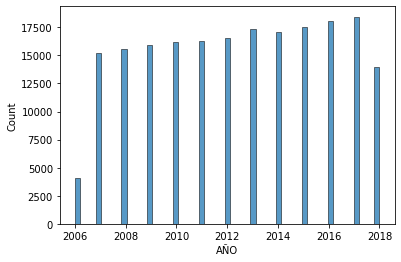

In [29]:
sns.histplot(data=data, x="AÑO")

Se puede observar que de los datos, la menor catidad de registros están para el año 2006 y 2018

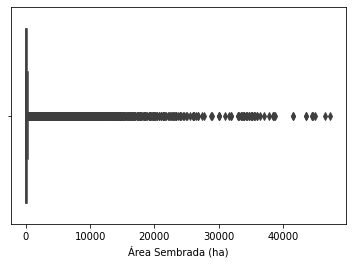

In [30]:
sns.boxplot(x=data["Área Sembrada (ha)"])

In [31]:
data["Área Sembrada (ha)"].describe()

count    202261.000000
mean        295.076179
std        1162.515029
min           0.000000
25%          10.000000
50%          36.000000
75%         156.000000
max       47403.000000
Name: Área Sembrada (ha), dtype: float64

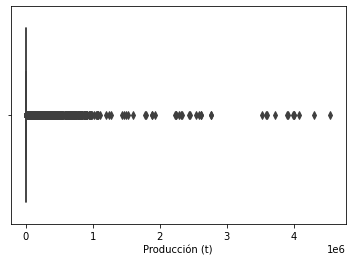

In [32]:
sns.boxplot(x=data["Producción (t)"])

In [33]:
data["Producción (t)"].describe()

count    2.022610e+05
mean     2.843253e+03
std      4.553568e+04
min      1.000000e+00
25%      3.500000e+01
50%      1.500000e+02
75%      6.730000e+02
max      4.546116e+06
Name: Producción (t), dtype: float64

In [34]:
df_estFisPrd = data[{"ESTADO FISICO PRODUCCION", "CICLO DE CULTIVO"}].groupby("ESTADO FISICO PRODUCCION").count().sort_values("CICLO DE CULTIVO", ascending=False).rename(columns={"CICLO DE CULTIVO":"Total Estado Fisico Producción"}).reset_index()
df_estFisPrd

ESTADO FISICO PRODUCCION  Total Estado Fisico Producción
0              FRUTO FRESCO                           57663
1                GRANO SECO                           56728
2          HORTALIZA FRESCA                           31587
3          TUBERCULO FRESCO                           21694
4               PADDY VERDE                            7404
5    CAFE VERDE EQUIVALENTE                            7216
6                    PANELA                            6641
7         LEGUMINOSA FRESCA                            3902
8               HOJA FRESCA                            1665
9                 HOJA SECA                            1325
10             ACEITE CRUDO                            1216
11                  SEMILLA                             952
12               FIBRA SECA                             951
13               LATEX SECO                             885
14                   MELAZA                             788
15       CAÑA PARA MOLIENDA                             619
16              FLOR FRESCA                             508
17           FORRAJE FRESCO                             234
18       SEMILLA OLEAGINOSA                             148
19           FOLLAJE FRESCO                             115
20             HONGO FRESCO                              14
21                       ND                               4
22             SEMILLA SECA                               2

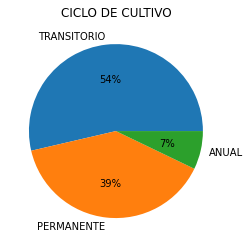

In [35]:
df_ciclodecultivo = data[{"ESTADO FISICO PRODUCCION", "CICLO DE CULTIVO"}].groupby("CICLO DE CULTIVO").count().sort_values("ESTADO FISICO PRODUCCION", ascending=False).rename(columns={"ESTADO FISICO PRODUCCION":"Total Ciclo de cultivo"}).reset_index()
df_ciclodecultivo

plt.pie(df_ciclodecultivo.loc[:,"Total Ciclo de cultivo"], labels = df_ciclodecultivo.loc[:, "CICLO DE CULTIVO"], autopct='%.0f%%')
plt.title('CICLO DE CULTIVO')
plt.show()

Ahora para alistar nuestros datos para que sean procesados por los algoritmos de Machine learning y poder generar modelos, primero procedemos a pasar las variables categóricas a un one hot encoder.:

In [36]:
data = pd.concat([data, pd.get_dummies(data['DEPARTAMENTO'],prefix='dep')], axis=1)
data.drop(['DEPARTAMENTO'], axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data['MUNICIPIO'],prefix='mun')], axis=1)
data.drop(['MUNICIPIO'], axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data['GRUPO DE CULTIVO'],prefix='gcult')], axis=1)
data.drop(['GRUPO DE CULTIVO'], axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data['PERIODO'],prefix='prd')], axis=1)
data.drop(['PERIODO'], axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data['ESTADO FISICO PRODUCCION'],prefix='efp')], axis=1)
data.drop(['ESTADO FISICO PRODUCCION'], axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data['CICLO DE CULTIVO'],prefix='ciclo')], axis=1)
data.drop(['CICLO DE CULTIVO'], axis=1, inplace=True)

# **Modelamiento**

Dado que se conoce que se obtienen mejores modelos con datos escalados, procedemos aplicar la función MinMaxScaler para poder normalizar todsos nuestros datos, a excepción de la columna "Producción (t)" que corresponde a columna objetivo de predicción.

In [37]:
# min-max scaling
scaler = MinMaxScaler()
scaler.fit(data.drop('Producción (t)',axis=1))
scaled_features = scaler.transform(data.drop('Producción (t)',axis=1))
data_normalized = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_normalized.head()

AÑO  Área Sembrada (ha)  Producción (t)  dep_AMAZONAS  dep_ANTIOQUIA  \
0  0.0            0.000042             0.0           0.0            0.0   
1  0.0            0.001730             0.0           0.0            0.0   
2  0.0            0.000042             0.0           0.0            0.0   
3  0.0            0.000063             0.0           0.0            0.0   
4  0.0            0.000021             0.0           0.0            0.0   

   dep_ARAUCA  dep_ATLANTICO  dep_BOLIVAR  dep_BOYACA  dep_CALDAS  ...  \
0         0.0            0.0          1.0         0.0         0.0  ...   
1         0.0            0.0          0.0         0.0         0.0  ...   
2         0.0            0.0          0.0         0.0         0.0  ...   
3         0.0            0.0          0.0         0.0         0.0  ...   
4         0.0            0.0          0.0         0.0         0.0  ...   

   efp_MELAZA  efp_ND  efp_PADDY VERDE  efp_PANELA  efp_SEMILLA  \
0         0.0     0.0              0.0         0.0          0.0   
1         0.0     0.0              0.0         0.0          0.0   
2         0.0     0.0              0.0         0.0          0.0   
3         0.0     0.0              0.0         0.0          0.0   
4         0.0     0.0              0.0         0.0          0.0   

   efp_SEMILLA OLEAGINOSA  efp_SEMILLA SECA  efp_TUBERCULO FRESCO  \
0                     0.0               0.0                   0.0   
1                     0.0               0.0                   0.0   
2                     0.0               0.0                   0.0   
3                     0.0               0.0                   0.0   
4                     0.0               0.0                   0.0   

   ciclo_ANUAL  ciclo_PERMANENTE  
0          0.0               1.0  
1          0.0               1.0  
2          0.0               1.0  
3          0.0               1.0  
4          0.0               1.0  

[5 rows x 1094 columns]

Con el procesamiento descrito anteriormente, seguimos a realizar la divisón de los datos entre entrenamiento y evaluación en una relación de 20% y 80% respectivamente

In [38]:
Y = data['Producción (t)']

X_train, X_test, Y_train, Y_test = train_test_split(data_normalized, Y, test_size = 0.2, random_state = 100)

Dado que es un problema de regresión, se decide escoger la métrica de error absoluto medio (mean_absolute_error) para poder medir el error del algoritmo y el R2 Score .

In [39]:
X_train.head()

AÑO  Área Sembrada (ha)  Producción (t)  dep_AMAZONAS  \
80441   0.500000            0.015822             0.0           0.0   
79265   0.916667            0.003924             0.0           0.0   
67833   0.750000            0.007194             0.0           0.0   
192315  0.250000            0.001582             0.0           1.0   
27427   0.250000            0.000253             0.0           0.0   

        dep_ANTIOQUIA  dep_ARAUCA  dep_ATLANTICO  dep_BOLIVAR  dep_BOYACA  \
80441             0.0         0.0            0.0          0.0         0.0   
79265             0.0         0.0            0.0          0.0         0.0   
67833             0.0         0.0            0.0          0.0         0.0   
192315            0.0         0.0            0.0          0.0         0.0   
27427             0.0         0.0            0.0          0.0         0.0   

        dep_CALDAS  ...  efp_MELAZA  efp_ND  efp_PADDY VERDE  efp_PANELA  \
80441          0.0  ...         0.0     0.0              0.0         0.0   
79265          0.0  ...         0.0     0.0              0.0         0.0   
67833          0.0  ...         0.0     0.0              0.0         0.0   
192315         0.0  ...         0.0     0.0              0.0         0.0   
27427          0.0  ...         0.0     0.0              0.0         0.0   

        efp_SEMILLA  efp_SEMILLA OLEAGINOSA  efp_SEMILLA SECA  \
80441           0.0                     0.0               0.0   
79265           0.0                     0.0               0.0   
67833           0.0                     0.0               0.0   
192315          0.0                     0.0               1.0   
27427           0.0                     0.0               0.0   

        efp_TUBERCULO FRESCO  ciclo_ANUAL  ciclo_PERMANENTE  
80441                    0.0          0.0               1.0  
79265                    0.0          0.0               1.0  
67833                    0.0          1.0               0.0  
192315                   1.0          0.0               0.0  
27427                    0.0          1.0               0.0  

[5 rows x 1094 columns]

## **Regresión Lineal**

In [40]:
Y_train.shape

(161808,)

In [41]:
Y_test.shape

(40453,)

In [42]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

#predicciones con los datos de entrenamiento
lr_pred_train = reg.predict(X_train)
#predicciones con los datos de evaluación:
lr_pred_test = reg.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento:", mean_absolute_error(Y_train, lr_pred_train))
print("Error para datos evaluación:", mean_absolute_error(Y_test, lr_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, lr_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, lr_pred_test))

Error para datos entrenamiento: 5867.559211380154
Error para datos evaluación: 6247.714826465281
R2-score para datos entrenamiento: 0.45272
R2-score para datos evaluación: 0.45971


In [43]:
rdg = Ridge()
rdg.fit(X_train, Y_train)

#predicciones con los datos de entrenamiento
rdg_pred_train = rdg.predict(X_train)
#predicciones con los datos de evaluación:
rdg_pred_test = rdg.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento:", mean_absolute_error(Y_train, rdg_pred_train))
print("Error para datos evaluación:", mean_absolute_error(Y_test, rdg_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, rdg_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, rdg_pred_test))

Error para datos entrenamiento: 5790.458671726083
Error para datos evaluación: 6170.881799920526
R2-score para datos entrenamiento: 0.45267
R2-score para datos evaluación: 0.45884


In [44]:
las = Lasso()
las.fit(X_train, Y_train)

#predicciones con los datos de entrenamiento
las_pred_train = las.predict(X_train)
#predicciones con los datos de evaluación:
las_pred_test = las.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento:", mean_absolute_error(Y_train, las_pred_train))
print("Error para datos evaluación:", mean_absolute_error(Y_test, las_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, las_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, las_pred_test))

Error para datos entrenamiento: 5602.839533016102
Error para datos evaluación: 5975.188101697704
R2-score para datos entrenamiento: 0.45189
R2-score para datos evaluación: 0.45818


## **Regresor con SVM**

In [ ]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, Y_train)

#predicciones con los datos de entrenamiento
svr_pred_train = svr.predict(X_train)
#predicciones con los datos de evaluación:
svr_pred_test = svr.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento random forest:", mean_absolute_error(Y_train, svr_pred_train))
print("Error para datos evaluación random forest:", mean_absolute_error(Y_test, svr_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, svr_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, svr_pred_test))


## **Random Forest**

In [45]:
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

#predicciones con los datos de entrenamiento
rfr_pred_train = rfr.predict(X_train)
#predicciones con los datos de evaluación:
rfr_pred_test = rfr.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento random forest:", mean_absolute_error(Y_train, rfr_pred_train))
print("Error para datos evaluación random forest:", mean_absolute_error(Y_test, rfr_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, rfr_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, rfr_pred_test))

Error para datos entrenamiento random forest: 158.20988426690215
Error para datos evaluación random forest: 483.06266799685017
R2-score para datos entrenamiento: 0.99855
R2-score para datos evaluación: 0.98918


## **Red Neuronal**

In [46]:
neuralmodel = MLPRegressor(hidden_layer_sizes=200, activation="relu", learning_rate = 'adaptive',solver="adam", alpha=0.001, random_state=32).fit(X_train, Y_train)

#predicciones con los datos de entrenamiento
rn_pred_train = neuralmodel.predict(X_train)
#predicciones con los datos de evaluación:
rn_pred_test = neuralmodel.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento random forest:", mean_absolute_error(Y_train, rn_pred_train))
print("Error para datos evaluación random forest:", mean_absolute_error(Y_test, rn_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, rn_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, rn_pred_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Error para datos entrenamiento random forest: 3338.6699367981814
Error para datos evaluación random forest: 3707.1962916546554
R2-score para datos entrenamiento: 0.39302
R2-score para datos evaluación: 0.37172


## **Búsqueda de hiperparámetros para obtener mejor modelo (Random Forest)**

Los resultados del modelo con Randomforest son muy buenos, a continuación se hace búsqueda de hiperparámetros para ver si hay oportunidad de tener un mejor modelo.

In [42]:
parameters = {
              'n_estimators':[100,150,200,500],
              'max_depth': [None,1,3,4],
              'min_samples_split':[1,2,4],
              'min_samples_leaf': [1,3,5]
              }

clf = GridSearchCV(RandomForestRegressor(), parameters, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

In [ ]:
#entrenar el modelo
clf.fit(X_train, Y_train)

#asignar el mejor modelo
best_model = clf.best_estimator_

pd.DataFrame(clf.cv_results_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
#conocer los mejores hiperparámetros de acuerdo a la búsqueda:
clf.best_params_

In [ ]:
#predicciones con los datos de entrenamiento
bm_pred_train = best_model.predict(X_train)
#predicciones con los datos de evaluación:
bm_pred_test = best_model.predict(X_test)

#Métrica de valor absoluto del error:
print("Error para datos entrenamiento random forest:", mean_absolute_error(Y_train, bm_pred_train))
print("Error para datos evaluación random forest:", mean_absolute_error(Y_test, bm_pred_test))

#R2 Score:
print("R2-score para datos entrenamiento: %.5f" % r2_score(Y_train, bm_pred_train))
print("R2-score para datos evaluación: %.5f" % r2_score(Y_test, bm_pred_test))